In [48]:
from math import *

class FastFourierTransformer:
    @staticmethod
    def innerFFT(p, inverse=False):
        n = len(p)
        if n == 1:
            return p[:]

        p_even = FastFourierTransformer.innerFFT(p[0::2], inverse)
        p_odd = FastFourierTransformer.innerFFT(p[1::2], inverse)

        arg = (-2 if inverse else 2) * pi / n 
        w = complex(1, 0)  
        wn = complex(cos(arg), sin(arg))

        q = [complex(0, 0)] * len(p)
        for i in range(n // 2):
            q[i] = p_even[i] + w * p_odd[i]
            q[i + n // 2] = p_even[i] - w * p_odd[i]
            if inverse:
                q[i] = q[i] / 2
                q[i + n // 2] = q[i + n // 2] / 2
            w = w * wn

        return q
    
    @staticmethod
    def fft(p):
        return FastFourierTransformer.innerFFT(p, False)
    
    @staticmethod
    def ifft(p):
        return FastFourierTransformer.innerFFT(p, True)

In [96]:
import matplotlib.pyplot as mplot


def analyzeFFT(f, coefficient, func_title=""):
    def discretize(f, coefficient):
        x = [coefficient*i for i in range(100)]
        y = [f(coefficient*i) for i in range(100)]
        return x, y

    x, y = discretize(f, coefficient)
    marker_size = 7
    g = FastFourierTransformer.fft(y + [0]*28)
    mplot.xlabel("x")
    mplot.ylabel("y")
    mplot.title(func_title)
    series = (
        mplot.scatter(x, y, s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g)[:100], s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g[:127] + [0])[:100], s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g[:126] + [0]*2)[:100], s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g[:125] + [0]*3)[:100], s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g[:124] + [0]*4)[:100], s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g[:123] + [0]*5)[:100], s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g[:122] + [0]*6)[:100], s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g[:121] + [0]*7)[:100], s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g[:120] + [0]*8)[:100], s=marker_size),
        mplot.scatter(x, FastFourierTransformer.ifft(g[:119] + [0]*9)[:100], s=marker_size)
    )
    mplot.figlegend(series, (func_title, "100%", "99.2%", "98.4%", "97.7%", "96.9%", "96.1%", "95.3%", "94.5%", "93.7%"), 5)
    mplot.show()

D:\Programming\Anaconda\lib\site-packages\numpy\core\numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


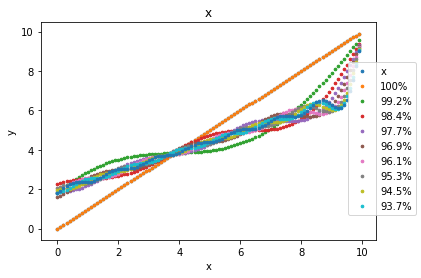

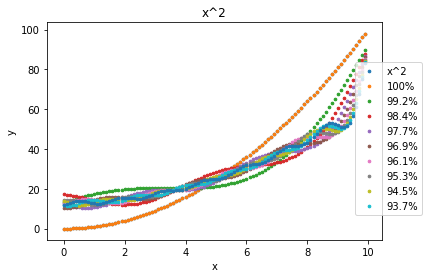

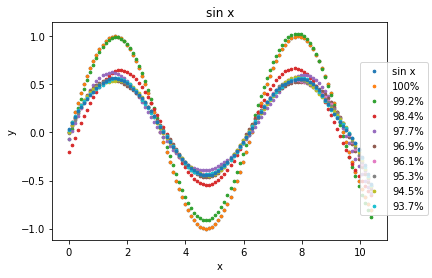

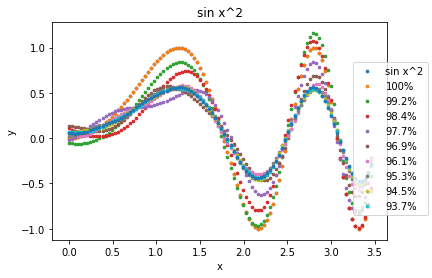

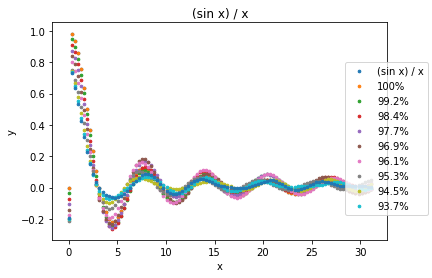

In [97]:
# Подбираем точки с помощью коэффициентов дискретизации так, чтобы графики выглядели красивее =)
analyzeFFT(lambda x: x, 0.1, "x")
analyzeFFT(lambda x: x**2, 0.1, "x^2")
analyzeFFT(sin, pi/30, "sin x")
analyzeFFT(lambda x: sin(x**2), pi/90, "sin x^2")
analyzeFFT(lambda x: sin(x) / (x + 1e-10), pi/10, "(sin x) / x")